In [3]:
import sys 
sys.path.append("..")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import pmesh

from scipy.interpolate import interp1d

from nbodykit.lab import FFTPower
from nbodykit.source.catalog.file import BigFileCatalog

fastpm_tng_seed = BigFileCatalog(
    "/pscratch/sd/b/bthorne/fairuniverse/hsc_dataset/fastpm_box704/TNG_new_n4/Om_0.3089_S8_0.8159_0.2494",
    dataset="1"
)
fastpm_tng_seed.attrs["Nmesh"] = 256


In [4]:
baryon_power_spectra_path = "/global/homes/b/bthorne/projects/berkeley/FAIR-Universe/baryon-power-spectra/logPkRatio/logPkRatio_TNG100.dat"
Tb_TNG100 = pd.read_csv(baryon_power_spectra_path, sep='\s+')
Tb_TNG100

,logk,z371,z349,z328,z290,z244,z210,z174,z141,z104,z070,z035,z018,z000
0,-3.301030,0.000000e+00,0.000000e+00,0.000000e+00,-2.569129e-26,0.000000e+00,-5.138258e-26,-1.027652e-25,-2.055303e-25,-4.110607e-25,0.000000e+00,-8.221214e-25,0.000000e+00,0.000000e+00
1,-3.164079,6.206257e-10,5.475229e-10,4.466361e-10,5.405100e-10,1.108093e-09,2.273162e-09,4.440284e-09,6.805686e-09,1.014725e-08,1.431205e-08,1.984453e-08,2.117875e-08,2.338748e-08
2,-3.027129,2.052288e-10,1.810552e-10,1.476939e-10,1.787361e-10,3.664248e-10,7.516903e-10,1.468316e-09,2.250508e-09,3.355500e-09,4.732717e-09,6.562200e-09,7.003400e-09,7.733786e-09
3,-2.890178,-1.246191e-09,-1.099403e-09,-8.968267e-10,-1.085322e-09,-2.225005e-09,-4.564414e-09,-8.915906e-09,-1.366553e-08,-2.037526e-08,-2.873800e-08,-3.984699e-08,-4.252604e-08,-4.696110e-08
4,-2.753228,-1.686399e-09,-1.487760e-09,-1.213625e-09,-1.468704e-09,-3.010973e-09,-6.176761e-09,-1.206539e-08,-1.849279e-08,-2.757269e-08,-3.888950e-08,-5.392266e-08,-5.754808e-08,-6.354978e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,3.130864,5.373991e-01,5.535576e-01,7.680480e-01,7.955329e-01,1.134641e+00,1.118823e+00,1.180108e+00,1.310323e+00,1.584307e+00,1.705023e+00,1.811097e+00,1.689401e+00,1.583102e+00
321,3.142171,5.429954e-01,5.591406e-01,7.758015e-01,8.034085e-01,1.146328e+00,1.130252e+00,1.192250e+00,1.324029e+00,1.601343e+00,1.723786e+00,1.831965e+00,1.709131e+00,1.602041e+00
322,3.153477,5.486209e-01,5.647519e-01,7.835943e-01,8.113231e-01,1.158075e+00,1.141738e+00,1.204454e+00,1.337806e+00,1.618468e+00,1.742648e+00,1.852948e+00,1.728970e+00,1.621088e+00
323,3.164784,5.542757e-01,5.703915e-01,7.914265e-01,8.192769e-01,1.169883e+00,1.153283e+00,1.216719e+00,1.351652e+00,1.635682e+00,1.761610e+00,1.874047e+00,1.748919e+00,1.640242e+00


In [5]:

# TNG redshifts copied from baryon-power-spectra
redshifts = np.array([3.71,3.49,3.28,2.90,2.44,2.1,1.74,1.41,1.04,0.7,0.35,0.18,0.0])
redshift_columns = [f"z{redshift:.2f}".replace(".", "") for redshift in redshifts]
print(redshift_columns)

['z371', 'z349', 'z328', 'z290', 'z244', 'z210', 'z174', 'z141', 'z104', 'z070', 'z035', 'z018', 'z000']


In [6]:
new_redshifts = [0.2, 0.7]
new_redshift_columns = [f"z{redshift:.2f}".replace(".", "") for redshift in new_redshifts]
# Interpolating for each row (power spectrum at a given scale) across redshifts
for new_redshift in new_redshifts:
    new_column = []
    for index, row in Tb_TNG100.iterrows():
        #redshifts = list(df.columns)
        power_values = row[redshift_columns].values
        interpolator = interp1d(redshifts, power_values, kind='linear')  # You can also try other kinds like 'cubic'
        interpolated_value = interpolator(new_redshift)
        new_column.append(interpolated_value)
    Tb_TNG100[f"z{new_redshift:.2f}".replace(".", "") ] = new_column


In [7]:
Tb_TNG100

,logk,z371,z349,z328,z290,z244,z210,z174,z141,z104,z070,z035,z018,z000,z020
0,-3.301030,0.000000e+00,0.000000e+00,0.000000e+00,-2.569129e-26,0.000000e+00,-5.138258e-26,-1.027652e-25,-2.055303e-25,-4.110607e-25,0.0,-8.221214e-25,0.000000e+00,0.000000e+00,-9.672015958280184e-26
1,-3.164079,6.206257e-10,5.475229e-10,4.466361e-10,5.405100e-10,1.108093e-09,2.273162e-09,4.440284e-09,6.805686e-09,1.014725e-08,1.4312050964165862e-08,1.984453e-08,2.117875e-08,2.338748e-08,2.102178086825898e-08
2,-3.027129,2.052288e-10,1.810552e-10,1.476939e-10,1.787361e-10,3.664248e-10,7.516903e-10,1.468316e-09,2.250508e-09,3.355500e-09,4.73271675988161e-09,6.562200e-09,7.003400e-09,7.733786e-09,6.951493876514882e-09
3,-2.890178,-1.246191e-09,-1.099403e-09,-8.968267e-10,-1.085322e-09,-2.225005e-09,-4.564414e-09,-8.915906e-09,-1.366553e-08,-2.037526e-08,-2.8738002612852755e-08,-3.984699e-08,-4.252604e-08,-4.696110e-08,-4.22108609752323e-08
4,-2.753228,-1.686399e-09,-1.487760e-09,-1.213625e-09,-1.468704e-09,-3.010973e-09,-6.176761e-09,-1.206539e-08,-1.849279e-08,-2.757269e-08,-3.8889503983163295e-08,-5.392266e-08,-5.754808e-08,-6.354978e-08,-5.712155671163033e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,3.130864,5.373991e-01,5.535576e-01,7.680480e-01,7.955329e-01,1.134641e+00,1.118823e+00,1.180108e+00,1.310323e+00,1.584307e+00,1.705023369194472,1.811097e+00,1.689401e+00,1.583102e+00,1.7037185499867744
321,3.142171,5.429954e-01,5.591406e-01,7.758015e-01,8.034085e-01,1.146328e+00,1.130252e+00,1.192250e+00,1.324029e+00,1.601343e+00,1.723785917877431,1.831965e+00,1.709131e+00,1.602041e+00,1.7235817584184074
322,3.153477,5.486209e-01,5.647519e-01,7.835943e-01,8.113231e-01,1.158075e+00,1.141738e+00,1.204454e+00,1.337806e+00,1.618468e+00,1.742648217973625,1.852948e+00,1.728970e+00,1.621088e+00,1.7435555482044616
323,3.164784,5.542757e-01,5.703915e-01,7.914265e-01,8.192769e-01,1.169883e+00,1.153283e+00,1.216719e+00,1.351652e+00,1.635682e+00,1.7616102694830524,1.874047e+00,1.748919e+00,1.640242e+00,1.7636399193449341


(-0.4, 0.9)

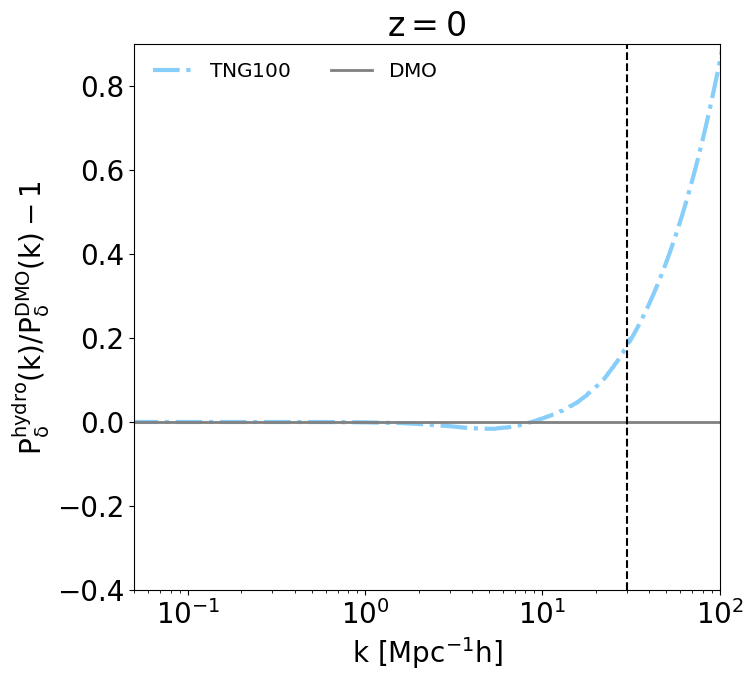

In [30]:
title=r'$\mathrm{z=0}$'
colz = "z244"

fig = plt.figure(figsize=(7.2,6.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.158 ,0.11,0.813,0.84])

ax1.plot(10**Tb_TNG100['logk'], 10**Tb_TNG100[colz] - 1, label=r'$\mathrm{TNG100}$', color="lightskyblue", lw=3, ls='-.')

ax1.axhline(y=0, color='gray', linestyle='-', label=r'$\mathrm{DMO}$', lw=2)
ax1.axvline(x=30, color='k', linestyle='--')


ax1.set_xscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax1.set_ylabel(r'$\mathrm{P_{\delta}^{hydro}(k)/P_{\delta}^{DMO}(k)-1}$')
ax1.set_title(title)

ax1.set_xlim(0.05,100)
 
ax1.legend(loc="best",prop={'size': 14.5},ncol=2,frameon=False)
ax1.set_ylim(-0.4,0.9)

In [49]:
def interpolate_power_ratio(df, redshift_column, wavenumbers):
    # Extract the log wavenumbers and power for the specified redshift
    logk_values = df['logk'].values
    log_power_values = df[redshift_column].values
    
    # Create an interpolating function using SciPy's interp1d
    # We need to convert logk_values back to k_values for interpolation
    k_values = 10**logk_values
    power_values = 10**log_power_values
    interpolator = interp1d(k_values, power_values, kind='cubic', fill_value='extrapolate')

    # Use the interpolating function to calculate the power at the specified wavenumbers
    interpolated_power = interpolator(wavenumbers)
    
    return interpolated_power


In [50]:
new_ks = np.logspace(-2, 2, 1000)
interp_Pkratio = interpolate_power_ratio(Tb_TNG100, colz, new_ks)

(-0.4, 0.9)

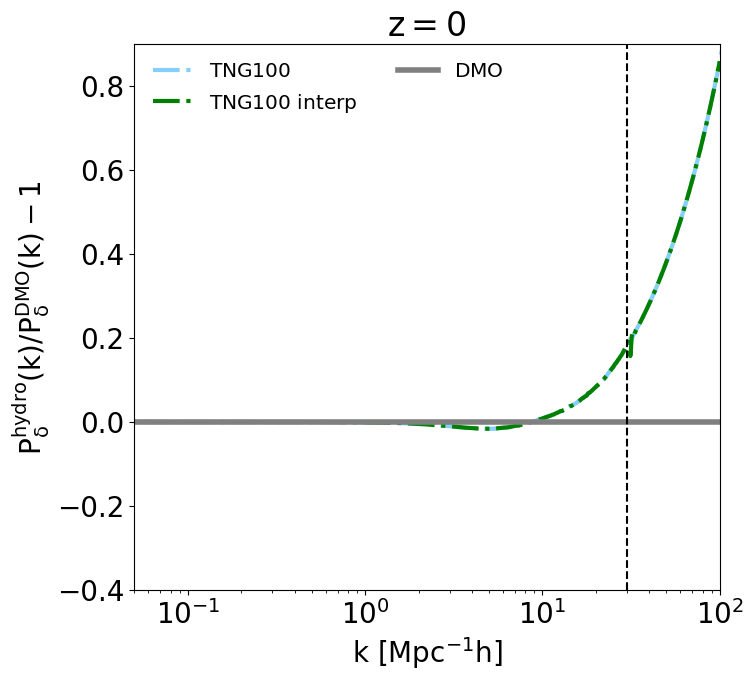

In [51]:
fig = plt.figure(figsize=(7.2,6.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.158 ,0.11,0.813,0.84])

ax1.plot(10**Tb_TNG100['logk'], 10**Tb_TNG100[colz] - 1, label=r'$\mathrm{TNG100}$', color="lightskyblue", lw=3, ls='-.')
ax1.plot(new_ks, 10**interp_Pkratio - 1, label=r'$\mathrm{TNG100}~{}\rm interp$', color="green", lw=3, ls='-.')

ax1.axhline(y=0, color='gray', linestyle='-', label=r'$\mathrm{DMO}$', lw=4)
ax1.axvline(x=30, color='k', linestyle='--')


ax1.set_xscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax1.set_ylabel(r'$\mathrm{P_{\delta}^{hydro}(k)/P_{\delta}^{DMO}(k)-1}$')
ax1.set_title(title)

ax1.set_xlim(0.05,100)
 
ax1.legend(loc="best",prop={'size': 14.5},ncol=2,frameon=False)
ax1.set_ylim(-0.4,0.9)